In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

df = pd.read_csv('PAYX_dataset_2019Fall.csv',sep=',')

In [2]:
df.head()

,Client_Id,A1,A2,A3,A4,A5,D1,B1,D2,A6,...,B5,E9,E10,E11,E12,E13,B6,Rep.Level,Size,Industry
0,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,Level 4,Size 3,Industry 10
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,Level 5,Size 4,Industry 6
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Level 5,Size 4,Industry 10
3,4,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,Level 4,Size 2,Industry 12
4,5,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,Level 4,Size 3,Industry 10


In [3]:
df.describe()

,Client_Id,A1,A2,A3,A4,A5,D1,B1,D2,A6,...,F2,B3,B4,B5,E9,E10,E11,E12,E13,B6
count,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,...,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000,382525.000000
mean,192949.628082,0.004026,0.001401,0.000413,0.187183,0.149245,0.002301,0.042157,0.192999,0.085790,...,0.179295,0.094945,0.000525,0.001124,0.002659,0.004622,0.006457,0.000941,0.225640,0.025070
std,111445.924694,0.063322,0.037407,0.020319,0.390058,0.356330,0.047908,0.200947,0.394659,0.280055,...,0.383607,0.293140,0.022917,0.033509,0.051494,0.067828,0.080096,0.030663,0.418004,0.156339
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96416.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,192898.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,289452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,386096.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


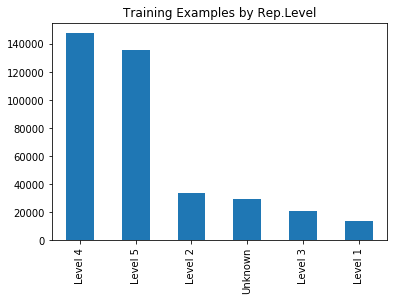

In [7]:
df['Rep.Level'].value_counts().plot(kind='bar', title='Training Examples by Rep.Level')
plt.show()

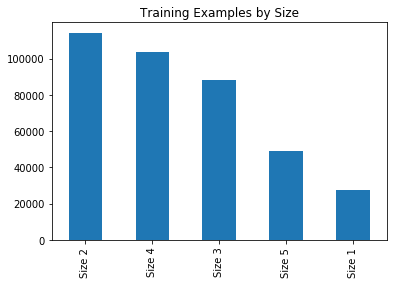

In [8]:
df['Size'].value_counts().plot(kind='bar', title='Training Examples by Size')
plt.show()

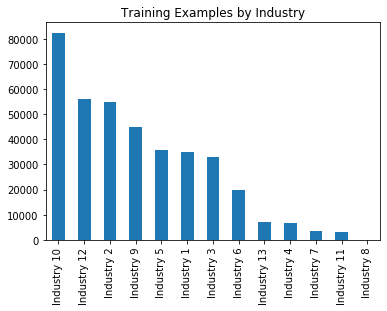

In [9]:
df['Industry'].value_counts().plot(kind='bar', title='Training Examples by Industry')
plt.show()

In [3]:
##High-level product category 
PROD_FST_LVL_CAT = ["A", "B", "C", "D", "E", "F"] 
##Low-level product category 
PROD_SEC_LVL_CAT = ['A1', 'A2', 'A3', 'A4', 'A5', 'D1', 'B1', 'D2',
       'A6', 'C1', 'C2', 'D3', 'C3', 'C5', 'C6', 'B2', 'A7', 'C7',
       'A8', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'D4', 'E8',
       'A9', 'F1', 'F2', 'B3', 'B4', 'B5', 'E9', 'E10', 'E11', 'E12']
##mapping ABCDEF to 012345
CAT_IND  = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5} 
AFF_MAT  = np.zeros((len(PROD_FST_LVL_CAT), len(PROD_FST_LVL_CAT)))

PROD_TO_IND = {}
for name in PROD_SEC_LVL_CAT:
    fst_lvl_name = name[0]
    PROD_TO_IND[name] = CAT_IND[fst_lvl_name]
print(PROD_TO_IND)

{'A1': 0, 'A2': 0, 'A3': 0, 'A4': 0, 'A5': 0, 'D1': 3, 'B1': 1, 'D2': 3, 'A6': 0, 'C1': 2, 'C2': 2, 'D3': 3, 'C3': 2, 'C5': 2, 'C6': 2, 'B2': 1, 'A7': 0, 'C7': 2, 'A8': 0, 'E1': 4, 'E2': 4, 'E3': 4, 'E4': 4, 'E5': 4, 'E6': 4, 'E7': 4, 'D4': 3, 'E8': 4, 'A9': 0, 'F1': 5, 'F2': 5, 'B3': 1, 'B4': 1, 'B5': 1, 'E9': 4, 'E10': 4, 'E11': 4, 'E12': 4}


<Figure size 432x288 with 0 Axes>

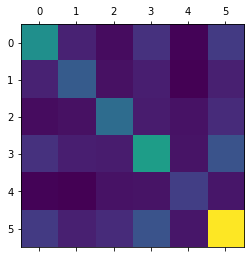

In [4]:
#count the frequency for appereance of 0,1,2,3,4,5,(0,1),(1,2)....
for ind, row in df.iterrows():
    current_row_cls = [0] * len(PROD_FST_LVL_CAT)
    for key in df.columns:
        if key in PROD_TO_IND.keys() and row[key] > 0:
            current_row_cls[PROD_TO_IND[key]] = 1
    for cat_ind, flag in enumerate(current_row_cls):
        if flag == 1:
            ind_i = cat_ind
            for other_cat_ind, other_flag in enumerate(current_row_cls):
                if other_flag == 1:
                    ind_j = other_cat_ind
                    AFF_MAT[ind_i, ind_j] += 1
plt.figure()
plt.matshow(AFF_MAT)
plt.show()

In [5]:
AFF_MAT

array([[ 79239.,  22812.,  13706.,  29193.,  10699.,  32840.],
       [ 22812.,  49652.,  15307.,  20910.,   9178.,  21786.],
       [ 13706.,  15307.,  58552.,  19832.,  15827.,  26523.],
       [ 29193.,  20910.,  19832.,  87078.,  16510.,  44931.],
       [ 10699.,   9178.,  15827.,  16510.,  35224.,  17897.],
       [ 32840.,  21786.,  26523.,  44931.,  17897., 149512.]])